## <h3 align="center"> **Atividade Prática**</h3> 




<h3 align="center"> Data: 21-07-2020 </h3> 

# Vamos iniciar trabalhando com os diferentes métodos de geração de conjuntos de classificadores. 


In [ ]:
# Importando bibliotecas necessárias
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

Vamos utilizar a base **Iris**

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Relembrando a base Iris


---


![texto alternativo](https://drive.google.com/uc?export=view&id=1y60Qw8n06cfSgDXL_sqHFaTYQl-tTpmE) 

In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# Particionando a base em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
#Como as estão distribuídas entre as partições
print("Particao de Treino", X_train.shape)
print("Particao de Teste", X_test.shape)

Particao de Treino (112, 4)
Particao de Teste (38, 4)


## **Será que um comitê é sempre melhor do que um preditor individual?**
 Aqui, nós vamos comparar Bagging, Boosting e Random Forest, todos utilizados com o Árvore de Decisão como algoritmo de base. 
 Nós vamos comparar o resultado obtido por cada método de geração de conjunto com o resultado de uma árvore de decisão.

In [ ]:
# Chamando os métodos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Para avaliação
from sklearn.metrics import accuracy_score


Agora,vamos testar os métodos de geração de conjuntos básicos todos utilizando Árvores de Decisão como Classificadores de base

In [ ]:
#Bagging : gerando o modelo

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=15)

# Treinando, testando e avaliando
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_bag))

0.9736842105263158


In [ ]:
#Random Forest

rf_clf = RandomForestClassifier(n_estimators=15)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))

0.9736842105263158


In [ ]:
#AdaBoost

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print(accuracy_score(y_test,y_pred_ada))

0.9736842105263158


In [ ]:
#GradientBoost

gb_clf = GradientBoostingClassifier(n_estimators=15)
gb_clf.fit(X_train,y_train)
y_pred_gb = gb_clf.predict(X_test)

print(accuracy_score(y_test,y_pred_gb))

0.9736842105263158


E somente uma árvore de decisão? Qual será o resultado?

In [ ]:
# Árvore de Decisão
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)
y_pred_DT = DT_clf.predict(X_test)

# Avaliação
print(accuracy_score(y_test, y_pred_DT))

0.9736842105263158


**Modificando a base de Dados**

Nós vamos fazer o mesmo teste, só que utilizando a base de dados Brest Cancer.

**Relembrando a base Brest Cancer**

Neste exemplo, nós utilizaremos a base **Breast Cancer** disponível no sklearn, mas originário do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e que descrevem **dois** tipos de classe: maligno (harmful) e benigno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal) e um alvo (tipo de câncer).



In [ ]:
#Carregando a base de dados
cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
#Verificando quantidade de instâncias e de atributos
# Vamos também acessar os dados

print(cancer.data.shape)
cancer.data

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# E  as classes
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Como nós faremos ajustes dos parâmetros dos métodos de geração de conjuntos, nós vamos dividir a base em três partições: treino, validação e teste. A base de treino terá 60% das instâncias, enquanto as bases de teste e de validação terão 20% cada.

In [ ]:
#Vamos, inicialmente, dividir a base em duas partições: treino e teste. A base de treino terá 80% das instâncias, enquanto a de teste terá 20%

from sklearn.model_selection import train_test_split

#Dividindo a base (com seleção de instâncias aleatória)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


Agora vamos dividir a base de treino em duas bases: treino e validação. Ao final, a base de treino terá 60% das instâncias originais, enquanto a base de validação terá 20%, assim como a base de teste já criada.

In [ ]:

#Dividindo a base de treino (com seleção de instâncias aleatória)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(341, 30) (341,)
(114, 30) (114,)


Agora nós vamos comparar o desempenho dos métodos de **Conjuntos de Classificadores** novamente utilizando **Árvore de Decisão** como algoritmo de base. 

Antes de utilizarmos os métodos de conjuntos, vamos testar o desempenho de uma única árvore.

É importante lembrar que, como haverá **ajuste de parâmetros**, a base de teste somente poderá ser usada ao final, após os parâmetros serem todos ajustados. Portanto, para o ajuste de parâmetros, nós utilizaremos a **base de validação**. Além disso, para facilitar a observação de ocorrência de **overfitting**, nós sempre compararemos a acurária no treino e na validação.


In [ ]:
# Cálculo da acurácia em validação de uma única árvore de decisão.

# Árvore de Decisão
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)
y_pred_DT = DT_clf.predict(X_val)
train_pred_DT = DT_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_DT))
print("Acurácia na validação", accuracy_score(y_val, y_pred_DT))

Acurácia no treino 1.0
Acurácia na validação 0.9298245614035088


In [ ]:
#Vamos fazer as predições com os métodos de geração de conjuntos

# Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=15)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_val)
train_pred_bag = bag_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_bag))
print("Acurácia na validação", accuracy_score(y_val, y_pred_bag))

Acurácia no treino 0.9970674486803519
Acurácia na validação 0.9385964912280702


In [ ]:
#Random Forest
rf_clf = RandomForestClassifier(n_estimators=15)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)
train_pred_rf = rf_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_rf))
print("Acurácia na validação", accuracy_score(y_val, y_pred_rf))

Acurácia no treino 1.0
Acurácia na validação 0.956140350877193


In [ ]:
#AdaBoost
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=15)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_val)
train_pred_ada = ada_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_ada))
print("Acurácia na validação", accuracy_score(y_val, y_pred_ada))

Acurácia no treino 1.0
Acurácia na validação 0.9385964912280702


In [ ]:
#GradientBoost
gb_clf = GradientBoostingClassifier(n_estimators=15)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_val)
train_pred_gb = gb_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_gb))
print("Acurácia na validação", accuracy_score(y_val, y_pred_gb))

Acurácia no treino 0.9941348973607038
Acurácia na validação 0.9473684210526315


**Atividade**

1. Primeiramente, você deverá estudar com detalhes os parâmetros de cada método de geração de conjunto.

* Os parâmetros mais discutidos (de acordo com a minha pesquisa hihi) que afetam diretamente o resultado do modelo em um conjunto de preditores são os números de estimadores disponiveis, e no caso daqueles que envolvem arvores temos o tamanho dela. Como o trabalho tem o objetivo de realizar uma comparação equivalente, optou-se por variar apenas o parâmetro n_estimators, comum em todos os geradores de conjunto.

2. Utilize a base de validação para ajustar os parâmetros de cada método de geração de conjunto a fim de definir a melhor combinação de parâmetros de cada método.

* Os melhores resultados para cada metodo estão dispostos a seguir:

  * **Bagging** - 30 - 90 | 0.93859649
  * **RandomForest** - 20 - 30 - 60 - 90 - 110 - 120 - 130 - 140 - 150 | 0.95614035
  * **AdaBoost** - 10 - 30 - 60 - 70 - 80 - 90 - 120 - 130 - 140 | 0.94736842
  * **GradientBoost** - 40 - 50 - 60 - 70 - 80 - 90 - 100 - 110 - 120 - 130 - 140 - 150 | 0.95614035
* Como todos apresentaram um melhor número de estimadores em comum (90), ele será utilizado para verificar a acurácia na base de treino.

3. Utilize a base de teste para comparar os resultados obtidos pela melhor versão de cada método de geração de conjuntos (definida na base de validação). Qual dos algoritmos de Aprendizagem de Máquina para geração de conjuntos de preditores testados apresentou melhor resultado? Apesente os resultados de comparação.

* O algoritmo que apresentou melhor resultado overall foi o RandomForest. Os resultados após a validação dos parâmetros a seguir:

  * **Bagging** |Acurácia no treino apos validação:  0.956140350877193 

  * **Random Forest** | Acurácia no treino apos validação:  0.9649122807017544 

  * **AdaBoost** | Acurácia no treino apos validação:  0.9473684210526315 

  * **GradientBoost** | Acurácia no treino apos validação:  0.956140350877193
* Como pode-se perceber, RandomForest e Bagging tiveram um leve aumento na sua acurácia entre treino x validação, mas todos apresentaram melhoras em comparação ao n_est usado na aula, além do treino ser bem parecido com a validação em todos os casos, o que indica a diminuição do overfitting e mostrando a necessidade da adequação dos hiper parâmetros.

In [ ]:
#Vamos fazer as predições com os métodos de geração de conjuntos

n_est = np.linspace(10,150,15,dtype=int)
bagging = []
random = []
adaboost = []
gradient = []

for i in n_est:
  # Bagging
  bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=i)
  bag_clf.fit(X_train, y_train)
  y_pred_bag = bag_clf.predict(X_val)
  atual = accuracy_score(y_val,y_pred_bag)
  bagging.append(atual)

  #Random Forest
  rf_clf = RandomForestClassifier(n_estimators=i)
  rf_clf.fit(X_train, y_train)
  y_pred_rf = rf_clf.predict(X_val)
  atual = accuracy_score(y_val,y_pred_rf)
  random.append(atual)
  
  #GradientBoost
  gb_clf = GradientBoostingClassifier(n_estimators=i)
  gb_clf.fit(X_train, y_train)
  y_pred_gb = gb_clf.predict(X_val)
  atual = accuracy_score(y_val,y_pred_gb)
  gradient.append(atual)

  #AdaBoost
  ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=i)
  ada_clf.fit(X_train, y_train)
  y_pred_ada = ada_clf.predict(X_val)
  atual = accuracy_score(y_val,y_pred_ada)
  adaboost.append(atual)


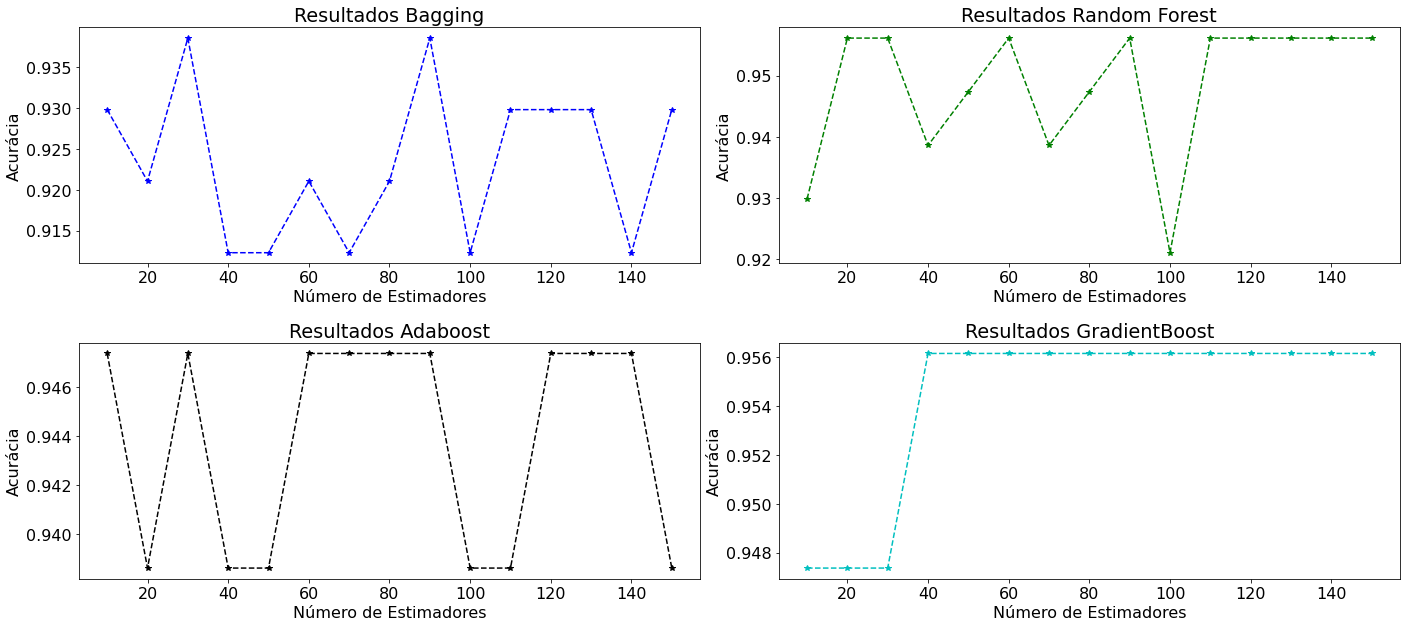


 bag [0.92982456 0.92105263 0.93859649 0.9122807  0.9122807  0.92105263
 0.9122807  0.92105263 0.93859649 0.9122807  0.92982456 0.92982456
 0.92982456 0.9122807  0.92982456] 

random [0.92982456 0.95614035 0.95614035 0.93859649 0.94736842 0.95614035
 0.93859649 0.94736842 0.95614035 0.92105263 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035] 

ada [0.94736842 0.93859649 0.94736842 0.93859649 0.93859649 0.94736842
 0.94736842 0.94736842 0.94736842 0.93859649 0.93859649 0.94736842
 0.94736842 0.94736842 0.93859649] 

grad [0.94736842 0.94736842 0.94736842 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035] 



In [ ]:
bagging = np.array(bagging)
random = np.array(random)
adaboost = np.array(adaboost)
gradient = np.array(gradient)

plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
plt.tight_layout()
plt.title('Resultados Bagging')
plt.plot(n_est,bagging,"*--",color = 'b')
plt.xlabel("Número de Estimadores")
plt.ylabel("Acurácia")
plt.subplot(2,2,2)
plt.tight_layout()
plt.title('Resultados Random Forest')
plt.plot(n_est,random,"*--",color = 'g')
plt.xlabel("Número de Estimadores")
plt.ylabel("Acurácia")
plt.subplot(2,2,3)
plt.tight_layout()
plt.title('Resultados Adaboost')
plt.plot(n_est,adaboost,"*--",color = 'k')
plt.xlabel("Número de Estimadores")
plt.ylabel("Acurácia")
plt.subplot(2,2,4)
plt.tight_layout()
plt.title('Resultados GradientBoost')
plt.plot(n_est,gradient,"*--",color = 'c')
plt.xlabel("Número de Estimadores")
plt.ylabel("Acurácia")
plt.show()

print('\n','bag',bagging,"\n")
print('random',random,'\n')
print('ada',adaboost,'\n')
print('grad',gradient,'\n')



# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white



In [ ]:
# Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=90)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
atual = accuracy_score(y_test,y_pred_bag)
print("Bagging |Acurácia no treino apos validação: ",atual,'\n')

#Random Forest
rf_clf = RandomForestClassifier(n_estimators=90)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
atual = accuracy_score(y_test,y_pred_rf)
print("Random Forest | Acurácia no treino apos validação: ",atual,'\n')

#GradientBoost
gb_clf = GradientBoostingClassifier(n_estimators=90)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
atual = accuracy_score(y_test,y_pred_gb)
print("GradientBoost | Acurácia no treino apos validação: ",atual,'\n')

#AdaBoost
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=90)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
atual = accuracy_score(y_test,y_pred_ada)
print("Adaboost | Acurácia no treino apos validação: ",atual,'\n')


Bagging |Acurácia no treino apos validação:  0.956140350877193 

Random Forest | Acurácia no treino apos validação:  0.9649122807017544 

GradientBoost | Acurácia no treino apos validação:  0.956140350877193 

Adaboost | Acurácia no treino apos validação:  0.9473684210526315 

